# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
weather_output = "output/cities.csv"

# Range of latitudes and longitudes
LAT_RANGE = (-90, 90)
LNG_RANGE = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'Cities list length: {len(cities)}')
print('This code block produces a new list of cities everytime it is run')


Cities list length: 628
This code block produces a new list of cities everytime it is run


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
#Function to connect to API
def get_weather(api_key, city):
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=imperial'
    print('This is the url for the first city in the cities list: ')
    return url
get_weather(api_key, city)

This is the url for the first city in the cities list: 


'https://api.openweathermap.org/data/2.5/weather?q=ushuaia&appid=c09f108397fa11d13ac8871c9b3fd324&units=imperial'

In [39]:
#Set preliminary variables
crec=0

cmax=len(cities)

citylist=[]
clouds=[]
country=[]
date=[]
humidity=[]
weather_lat=[]
weather_long=[]
max_temp=[]
wind_speed=[]

In [40]:
#Extract data from API
for c in cities:
    crec=crec + 1
    response=requests.get(get_weather(api_key=api_key, city=c)).json()

    try:
        print(f'Processing city {crec} of {cmax}: {response["name"]}')
        #print(f'------------------------------------------------------')
        citylist.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        weather_lat.append(response['coord']['lat'])
        weather_long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    except:
        pass
        print(f'$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
        print(f'Sorry, we could not find weather for {c}')
        print(f'$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')


This is the url for the first city in the cities list: 
Processing city 1 of 628: Ikalamavony
This is the url for the first city in the cities list: 
Processing city 2 of 628: Rikitea
This is the url for the first city in the cities list: 
Processing city 3 of 628: Hong Kong
This is the url for the first city in the cities list: 
Processing city 4 of 628: Norman Wells
This is the url for the first city in the cities list: 
Processing city 5 of 628: Green River
This is the url for the first city in the cities list: 
Processing city 6 of 628: Tuktoyaktuk
This is the url for the first city in the cities list: 
Processing city 7 of 628: Busselton
This is the url for the first city in the cities list: 
Processing city 8 of 628: Zacualpan
This is the url for the first city in the cities list: 
Processing city 9 of 628: Shurugwi
This is the url for the first city in the cities list: 
Processing city 10 of 628: Ushuaia
This is the url for the first city in the cities list: 
Processing city 11 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
df_weather = pd.DataFrame({
    "City": citylist,
    "Clouds": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": weather_lat,
    "Long": weather_long,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed})
df_weather.head()

,City,Clouds,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Ikalamavony,87,MG,1640014095,75,-21.1500,46.5833,73.22,5.12
1,Rikitea,100,PF,1640014095,77,-23.1203,-134.9692,74.37,19.33
2,Hong Kong,100,HK,1640014065,90,22.2855,114.1577,63.32,1.99
3,Norman Wells,90,CA,1640014096,71,65.2820,-126.8329,-3.96,12.66
4,Green River,43,US,1640014096,75,41.5286,-109.4662,19.80,2.89


In [42]:
#Export extracted API data to csv
df_weather.to_csv(weather_output)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

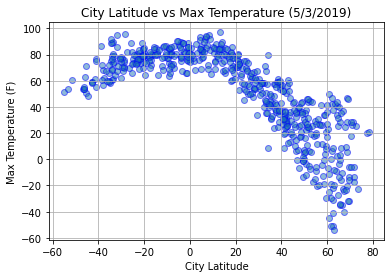

In [43]:
#Use matplotlib to visualize latitude vs temperature
lat_temp=plt.scatter(df_weather['Lat'],df_weather['Max Temp'],edgecolors='blue',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Max Temperature (5/3/2019)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('City Latitude')
plt.savefig('output/lat_temp_scatter.png')
plt.show()

#### Latitude vs. Humidity Plot

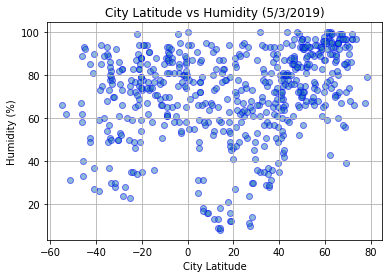

In [44]:
#Use matplotlib to visualize latitude vs humidity
lat_temp=plt.scatter(df_weather['Lat'],df_weather['Humidity'],edgecolors='blue',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Humidity (5/3/2019)')
plt.ylabel('Humidity (%)')
plt.xlabel('City Latitude')
plt.savefig('output/lat_humidity_scatter.png')


#### Latitude vs. Cloudiness Plot

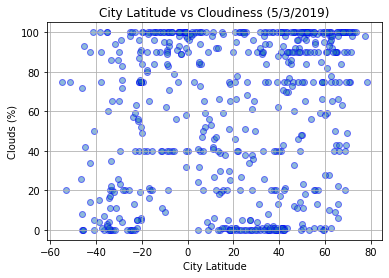

In [45]:
#Use matplotlib to visualize latitude vs clouds
lat_temp=plt.scatter(df_weather['Lat'],df_weather['Clouds'],edgecolors='blue',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Cloudiness (5/3/2019)')
plt.ylabel('Clouds (%)')
plt.xlabel('City Latitude')
plt.savefig('output/lat_cloud_scatter.png')
plt.show()

#### Latitude vs. Wind Speed Plot

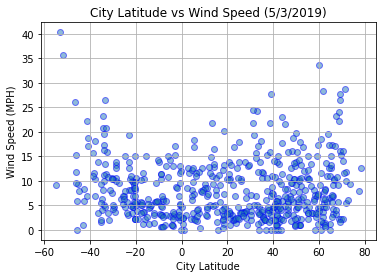

In [46]:
#Use matplotlib to visualize latitude vs wind speed
lat_temp=plt.scatter(df_weather['Lat'],df_weather['Wind Speed'],edgecolors='blue',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Wind Speed (5/3/2019)')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('City Latitude')
plt.savefig('output/lat_wind_scatter.png')
plt.show()